In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.model_selection import train_test_split

Veriyi train / test ayırmak için:

Model gerçek hayatta görmediği veride test edilir

In [48]:
from sklearn.metrics import mean_absolute_error, r2_score

Model performans ölçmek için:

MAE → Ortalama kaç salary hatası yapıyoruz.

R2 → Model veriyi ne kadar açıklıyor.

In [50]:
from xgboost import XGBRegressor

In [51]:
df = pd.read_csv('eda_data.csv')

In [52]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [53]:
df = df.drop(columns=[
    "Unnamed: 0",
    "Salary Estimate",
    "Job Description",
    "Company Name",
    "Location",
    "min_salary",
    "max_salary"
], errors="ignore")


Neden drop ettik

Unnamed:	Index artığı

Salary Estimate:	String salary (numeric zaten var)

Job Description:	NLP gerekir, şimdilik kullanmıyoruz

Company Name:	Model için anlamlı değil

Location:	Gürültü oluşturabilir

In [54]:
df = pd.get_dummies(df, drop_first = True)

ML modelleri string okuyamaz.
One-hot → kategorileri 0 / 1 yapar.

drop_first=True:
Dummy trap önlemek için.
Fazla kolon oluşmasını azaltır.

In [55]:
y = df["avg_salary"]
x = df.drop(columns=["avg_salary"])
# Sanitize column names: XGBoost requires feature names to be strings without '[', ']', '<', '>'
x.columns = x.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)

y → Modelin tahmin edeceği değer

X → Modelin input feature’ları

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

%80 train → model öğrenir.

%20 test → performans ölçülür.


random_state=42 -->
Her çalıştırmada aynı split oluşur

In [57]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

Parametre açıklaması:

--> n_estimators = 300

Kaç ağaç oluşturulacak. Fazla olursa daha iyi öğrenir ama yavaşlar.

--> learning_rate = 0.05

Her ağacın katkı miktarı, küçük olması daha stabil öğrenme

--> max_depth = 6

Ağaç karmaşıklığı, büyük olursa overfit riski

--> subsample = 0.8

Her ağaç için verinin %80’i kullanılır. Overfit azaltır.

--> colsample_bytree = 0.8

Her ağaç için feature’ların %80’i kullanılır.

Randomness → genelleme artar

In [58]:
model.fit(x_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [59]:
y_pred = model.predict(x_test)

In [60]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 11.06
R² Score: 0.8078


-----------------------------------------

Feature Importance (XGBoost)

                                                Feature  Importance
561                                  Sector_Health Care    0.042704
2                                                hourly    0.041338
1099                                   seniority_senior    0.039680
129                        Job Title_Lead Data Engineer    0.027686
1098                                       seniority_na    0.025587
1093                            job_simp_data scientist    0.022968
921                                    company_txt_Nuna    0.021808
1094                                  job_simp_director    0.018422
1057                                       job_state_CA    0.017710
106   Job Title_Director II, Data Science - GRM Actu...    0.015953
265           Job Title_Staff Machine Learning Engineer    0.015796
400                           Headquarters_OSAKA, Japan    0.013724
959                       company_txt_Reynolds American    0.012810
593   Competitors_Ancestry, Verily Life Sciences

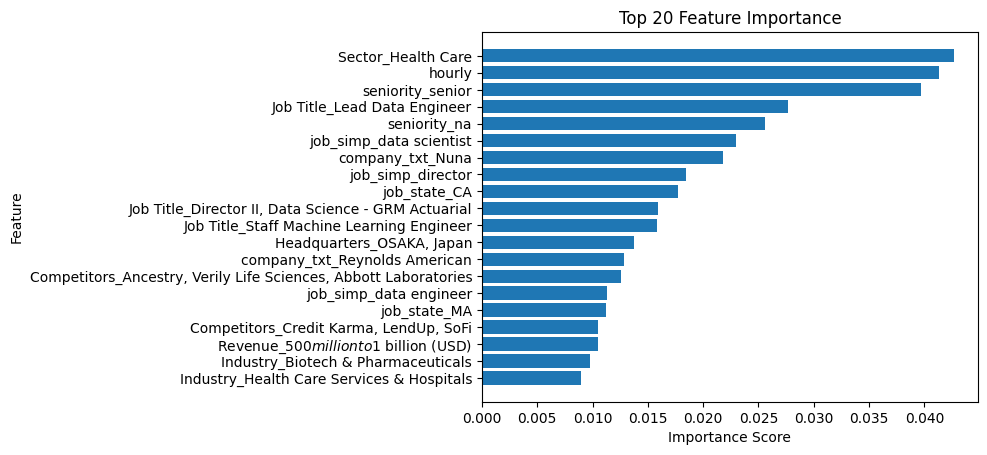

In [62]:
# Feature importance değerleri
importance = model.feature_importances_

# Feature isimleri
feature_names = x_train.columns

# DataFrame oluştur
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
})

# Büyükten küçüğe sırala
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# İlk 20 feature göster
print(feat_imp.head(20))

# Grafik çiz
plt.figure()
plt.barh(feat_imp["Feature"][:20][::-1], feat_imp["Importance"][:20][::-1])
plt.title("Top 20 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Kod Ne Yapıyor?

model.feature_importances_ → Model hangi feature’a ne kadar baktı

DataFrame → Okunabilir tablo

Sort → En önemli feature en üstte

Bar chart → Görsel analiz

--------------------------------------

Yeni Veri

In [65]:
new_data = {
    "Rating": 4.5,
    "Founded": 1998,
    "age": 27,
    "desc_len": 1500,
    "python_yn": 1,
    "spark": 1,
    "aws": 1,
    "excel": 1,
    "R_yn": 1
}
new_df = pd.DataFrame([new_data])
new_df = pd.get_dummies(new_df, drop_first=True)
new_df = new_df.reindex(columns=x_train.columns, fill_value=0)


In [66]:
prediction = model.predict(new_df)

print("Predicted Salary:", prediction[0])

Predicted Salary: 92.17101
